# Customer analysis in marketing campaigns

> This project was made by : Nidal, Clément, Mélody, Eden & Théo

Place of content 🔎 <br>
[1 - Exploratory Data Analysis]() <br>
&nbsp;&nbsp;&nbsp;&nbsp; [1.1 - Data exploration]()  <br>
&nbsp;&nbsp;&nbsp;&nbsp;    [1.2 - Feature engineering]()  <br>
&nbsp;&nbsp;&nbsp;&nbsp;    [1.3 - Data vizualisation]()  <br>
[2 - Customer segmentation]()  <br>
&nbsp;&nbsp;&nbsp;&nbsp;    [2.1 - RFM analysis]()  <br>
&nbsp;&nbsp;&nbsp;&nbsp;    [2.3 - Modeling]()  <br>


In this exercise, you work for a consulting firm as data scientist. In this scenario, your client is the marketing team of a grocery store. They would like to find which are the ideal customers according to the results of the last marketing campaigns. Your analysis will be helpful to adapt and modify products according to the different needs and behavior of their customers.

You dispose of a dataset from the mall dataset with several features:


People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if customer complained in the last 2 years, 0 otherwise

Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

- NumWebPurchases: Number of purchases made through the company’s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s web site in the last month

'Z_CostContact' and 'Z_Revenue' contains constant value across all the observations and therefore they will not contribute anything in the analysis.

## 1 - Exploratory Data Analysis

In [736]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import re

# Mutliple outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Plots for retina screens
%matplotlib inline
%config InlineBackend.figure_format='retina'

pd.set_option('display.max_columns', None)

In [737]:
campaign_df = pd.read_csv('../data/marketing_campaign.csv', sep="\t")
print('Dataset head(n=5) : \n')
campaign_df.head().style.format({
    'MntWines': '{} US$',
    'MntFruits': '{} US$',
    'MntMeatProducts': '{} US$',
    'MntFishProducts': '{} US$',
    'MntSweetProducts': '{} US$',
    'MntGoldProds': '{} US$',
    'Income': '{:,.0f} US$'
})

Dataset head(n=5) : 



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,"58,138 US$",0,0,04-09-2012,58,635 US$,88 US$,546 US$,172 US$,88 US$,88 US$,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,"46,344 US$",1,1,08-03-2014,38,11 US$,1 US$,6 US$,2 US$,1 US$,6 US$,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,"71,613 US$",0,0,21-08-2013,26,426 US$,49 US$,127 US$,111 US$,21 US$,42 US$,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,"26,646 US$",1,0,10-02-2014,26,11 US$,4 US$,20 US$,10 US$,3 US$,5 US$,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,"58,293 US$",1,0,19-01-2014,94,173 US$,43 US$,118 US$,46 US$,27 US$,15 US$,5,5,3,6,5,0,0,0,0,0,0,3,11,0


### 1.1 - Data exploration

In [738]:
print('\nData exploration')
print('\n-------------------------\n')

print('Dataset shape :', campaign_df.shape)
describe_df = campaign_df.describe(percentiles=np.arange(0, 1, .1))

print('\n-------------------------\n')

print('Dataset description : \n')
describe_df.round(1)

print('\n-------------------------\n')

print('Dataset uniqueness : \n')
res = []
for col in campaign_df.columns:
    res.append([col, campaign_df[col].is_unique])
pd.DataFrame(res).T

print('\n-------------------------\n')


print('Sum of missing values :\n')
pd.DataFrame(campaign_df.isna().sum()).T.style.applymap(lambda x: 'background-color : #ccc' if x>0 else '')
missing = campaign_df['Income'].isna().sum()
perc_missing_income = (missing / len(campaign_df['Income'])) * 100
print('\nIncome missing values : ', perc_missing_income.round(2), '%', f'({missing} values)')

print('\n-------------------------\n')

cat_cols = ['Education', 'Marital_Status'] # Categorial features
dt_cols = ['Dt_Customer'] # Datetime features
print('Categorical features :')
for i in cat_cols:
    print('\n')
    pd.DataFrame(campaign_df[i].value_counts()).T
    
    
print('\n-------------------------\n')

campaign_df['Dt_Customer'] = pd.to_datetime(campaign_df['Dt_Customer'])
print('Datetime describe :\n')
campaign_df[dt_cols].describe(datetime_is_numeric=True).T
min = campaign_df[dt_cols].min()
max = campaign_df[dt_cols].max()
dt_max = max.values[0]
print(f'Dt_customer\'s minimum : {min.values[0]} | Dt_customer\'s maximum : {dt_max}')

print('\n-------------------------\n')


Data exploration

-------------------------

Dataset shape : (2240, 29)

-------------------------

Dataset description : 



,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.0,2240.0,2216.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0,2240.0
mean,5592.2,1968.8,52247.3,0.4,0.5,49.1,303.9,26.3,167.0,37.5,27.1,44.0,2.3,4.1,2.7,5.8,5.3,0.1,0.1,0.1,0.1,0.0,0.0,3.0,11.0,0.1
std,3246.7,12.0,25173.1,0.5,0.5,29.0,336.6,39.8,225.7,54.6,41.3,52.2,1.9,2.8,2.9,3.3,2.4,0.3,0.3,0.3,0.2,0.1,0.1,0.0,0.0,0.4
min,0.0,1893.0,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
0%,0.0,1893.0,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
10%,1126.1,1952.0,24117.5,0.0,0.0,9.0,6.0,0.0,7.0,0.0,0.0,3.0,1.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
20%,2284.2,1957.0,32011.0,0.0,0.0,19.0,16.0,1.0,12.0,2.0,1.0,6.0,1.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
30%,3384.5,1962.0,38198.5,0.0,0.0,29.0,34.0,2.0,20.0,3.0,2.0,11.0,1.0,2.0,1.0,3.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
40%,4438.8,1966.0,44529.0,0.0,0.0,39.0,81.0,4.0,35.0,7.0,5.0,17.0,1.0,3.0,1.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
50%,5458.5,1970.0,51381.5,0.0,0.0,49.0,173.5,8.0,67.0,12.0,8.0,24.0,2.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0



-------------------------

Dataset uniqueness : 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False



-------------------------

Sum of missing values :



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



Income missing values :  1.07 % (24 values)

-------------------------

Categorical features :




,Graduation,PhD,Master,2n Cycle,Basic
Education,1127,486,370,203,54


,Married,Together,Single,Divorced,Widow,Alone,YOLO,Absurd
Marital_Status,864,580,480,232,77,3,2,2



-------------------------

Datetime describe :



,count,mean,min,25%,50%,75%,max
Dt_Customer,2240,2013-07-11 22:57:38.571428608,2012-01-08,2013-01-19 18:00:00,2013-07-11,2013-12-30 06:00:00,2014-12-06


Dt_customer's minimum : 2012-01-08T00:00:00.000000000 | Dt_customer's maximum : 2014-12-06T00:00:00.000000000

-------------------------



> Changes operated on the given dataset : <br> <br>
> `Income` : The missing data are insignificant. We'll drop them. <br>
> `Dt_customer` : Change the dtype to datetime <br>
> `Marital_Status` : Drop absurd values (n = 4) <br>
> `Income` : outliers drop

In [739]:
# Drop income and Marital_status defined nas
campaign_df.replace({'Marital_Status': ['YOLO', 'Absurd']}, np.nan, inplace=True)
campaign_df.dropna(inplace=True)

# Change dtype
# Alreday applied the cell before

# Drop otuliers
idx = campaign_df[campaign_df.Income == 666666.0].index
campaign_df.drop(idx, inplace=True);

### 1.2 - Feature selection and feature engineering 

> Feature engineering : <br> <br>
>
> `NumContacts` : Total number of purchases + web visits (= contact) <br>
> `NumContant` : Total number of customer contact <br>
> `age` : Customer age calculated based on the base date (= max date of dataset + 1) <br>
> `perc_Discounted_Purchases` : Percentage of purchases maded with a discount <br>
> `enrollment_days` : Days since customer enrollment 

In [740]:
num_cols = list(set(campaign_df.columns) - set(dt_cols) - set(cat_cols)) # Numeric features
people_num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Complain']

# Products (amount)
r = re.compile("^(Mnt).*")
mnt_cols = list(filter(r.match, campaign_df.columns)) 

# Contact n
r = re.compile("^(Num).*")
purchases_cols = list(filter(r.match, campaign_df.columns)) 

# Total contact n (piurcahses + visits)
campaign_df['NumContact'] = campaign_df[list(campaign_df[purchases_cols])].sum(axis=1)

In [741]:
# RFM feature enginering
# Recency 
recency = campaign_df['Recency']

# Frequency
campaign_df['Frequency'] = campaign_df['NumWebPurchases'] + campaign_df['NumCatalogPurchases'] + campaign_df['NumStorePurchases']

# Total amount
campaign_df['Monetary'] = campaign_df[list(campaign_df[mnt_cols])].sum(axis=1)

In [742]:
# Selection of features to plot
selected_cols = people_num + ['Monetary', 'Frequency', 'Recency']
df_toplot = campaign_df[selected_cols]

In [744]:
#depuis 14 : age, recence, 
# Percentage of total purchases made with discount
campaign_df['perc_Discounted_Purchases'] = campaign_df.apply(lambda x: round(((x.NumDealsPurchases / x.Frequency if x.Frequency != 0 else 1) * 100), 2), axis=1)

# Age based on max date
from datetime import timedelta 
campaign_df['Dt_Customer'] = pd.to_datetime(campaign_df['Dt_Customer'])
dt_max = np.max(campaign_df['Dt_Customer'])
base_date = dt_max + timedelta(days=1)
campaign_df['age'] = campaign_df.apply(lambda x: round(((base_date - pd.Timestamp(day=1, month=1, year=int(x.Year_Birth))).days) / 366), axis=1)
idx = campaign_df[campaign_df['age'] > 100].index
campaign_df.drop(idx, inplace=True)

# Enrollemnt in days
campaign_df['enrollment_days'] = campaign_df.apply(lambda x: (base_date - x.Dt_Customer).days, axis=1)

### 1.3 - Data vizualisation


Correlation matrix of selected columns :



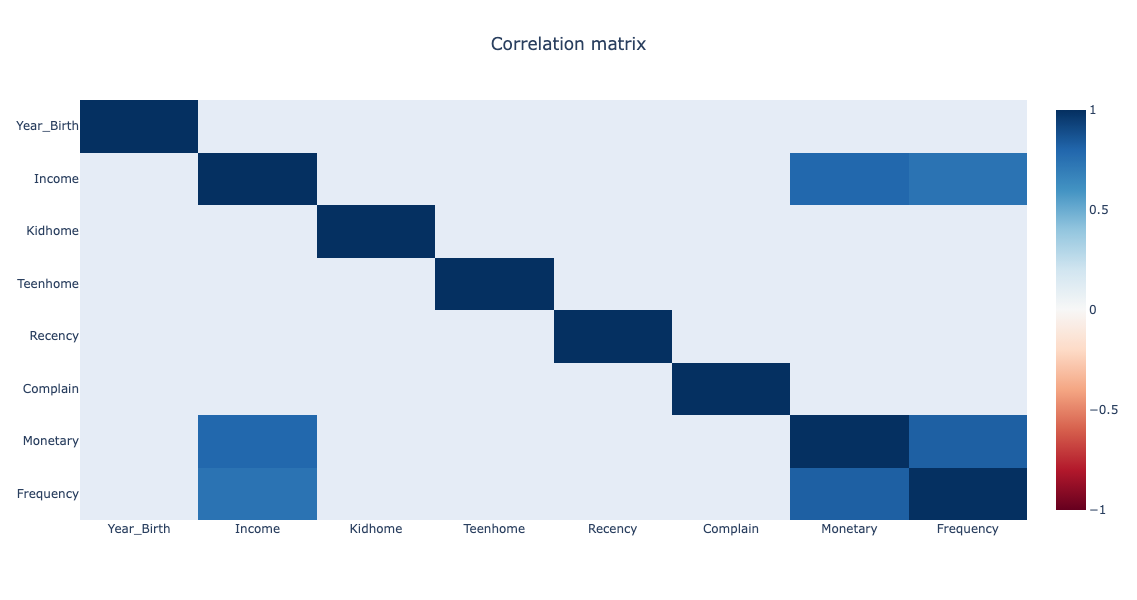

In [745]:
# Correlation
corr = df_toplot.corr()
corr = pd.concat([corr[corr < -0.5], corr[corr > 0.5]])[-9:]

heatmap = go.Heatmap(
    z=corr,
    x=corr.columns,
    y=corr.columns,
    colorscale=px.colors.diverging.RdBu,
    zmin=-1,
    zmax=1
)

layout = go.Layout(
    title_text='Correlation matrix', 
    title_x=0.5, 
    width=1100,
    height=600,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed'
)

fig=go.Figure(data=[heatmap], layout=layout)
print('\nCorrelation matrix of selected columns :\n')
fig.show()


Scatter plot of selected columns :



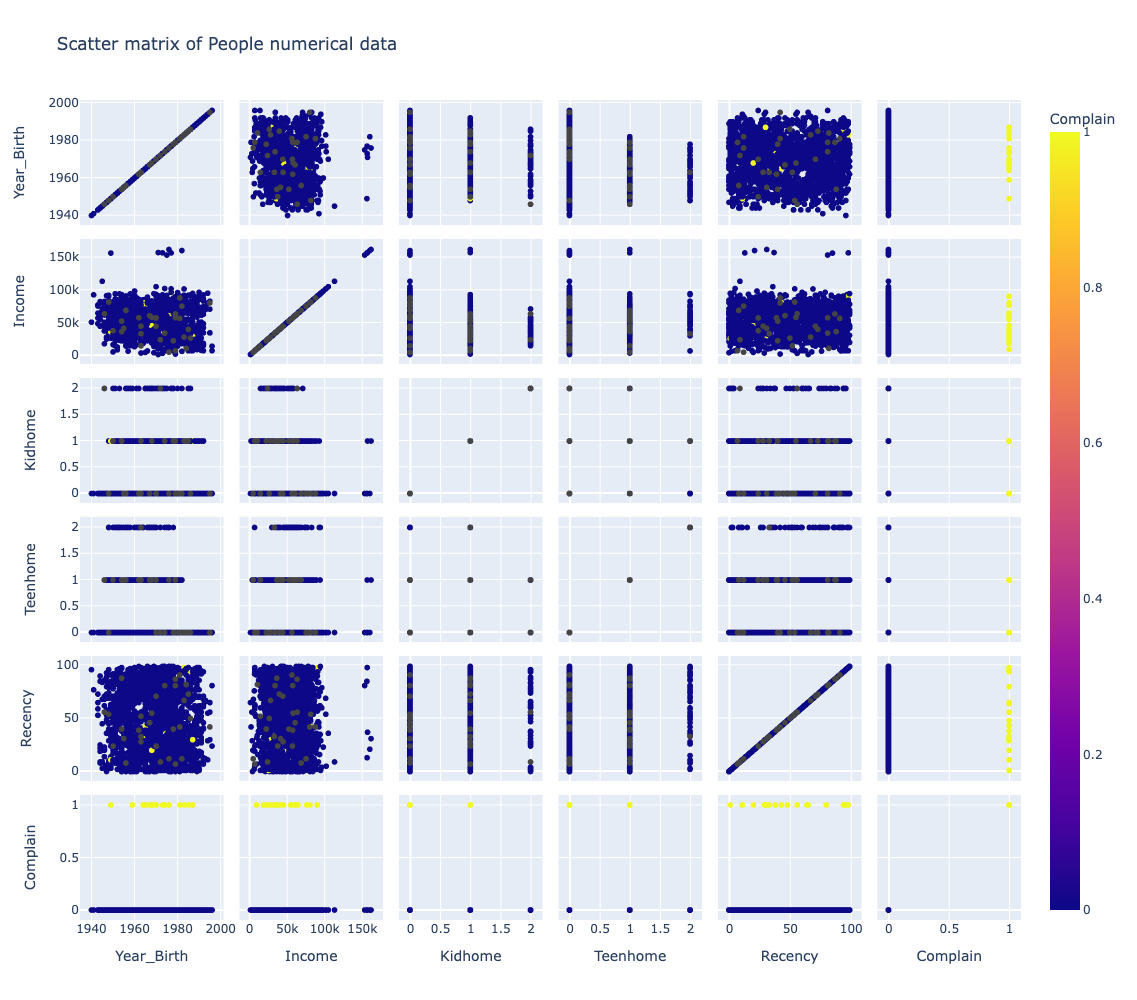

In [746]:
fig = px.scatter_matrix(campaign_df[people_num],
                        title="Scatter matrix of People numerical data",
                        color='Complain',
                        width=1200, 
                        height=1000)

print('\nScatter plot of selected columns :\n')
fig.show()

# 2 - Customer Segmentation

-------------
### 2.1 - RRM analysis

In [747]:
pd.options.mode.chained_assignment = None # To silence chained assignment warnings

rfm_df = campaign_df[['ID', 'Recency', 'Frequency', 'Monetary']]
quintiles = rfm_df[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()

def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    
    
# Gets scores for each
rfm_df['R'] = rfm_df['Recency'].apply(lambda x: r_score(x))
rfm_df['F'] = rfm_df['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm_df['M'] = rfm_df['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

# Get combined score
rfm_df['RFM'] = rfm_df['R'].map(str) + rfm_df['F'].map(str) + rfm_df['M'].map(str)

print('\nRFM dataframe :\n')
rfm_df.head()

#Assign fidelity level to each customer
labels = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm_df['Labels'] = rfm_df['R'].map(str) + rfm_df['F'].map(str)
rfm_df['Labels'] = rfm_df['Labels'].replace(labels, regex=True)

print('\nSegmentation labels count : \n')
pd.DataFrame(rfm_df['Labels'].value_counts(ascending=False)).T

print('\nSegmentation labels index :\n')


RFM dataframe :



,ID,Recency,Frequency,Monetary,R,F,M,RFM
0,5524,58,22,1617,3,5,5,355
1,2174,38,4,27,4,1,1,411
2,4141,26,20,776,4,4,4,444
3,6182,26,6,53,4,2,1,421
4,5324,94,14,422,1,3,3,133



Segmentation labels count : 



,hibernating,at risk,loyal customers,potential loyalists,about to sleep,champions,can't loose,promising,new customers,need attention
Labels,360,356,344,341,188,166,155,111,109,78



Segmentation labels index :



|Segment|Description|
|:--:|:--|
|Champions|Bought recently, buy often and spend the most|
|Loyal Customers|Buy on a regular basis. Responsive to promotions|
|Potential Loyalist	|Recent customers with average frequency|
|Recent Customers|Bought most recently, but not often|
|Promising|Recent shoppers, but haven’t spent much|
|Customers Needing Attention|Above average recency, frequency and monetary values. May not have bought very recently though|
|About To Sleep	|Below average recency and frequency. Will lose them if not reactivated|
|At Risk|Purchased often but a long time ago. Need to bring them back|
|Can’t Lose Them	|Used to purchase frequently but haven’t returned for a long time|
|Hibernating|Last purchase was long back and low number of orders. May be lost|


Distribution of Recency and Frequency :



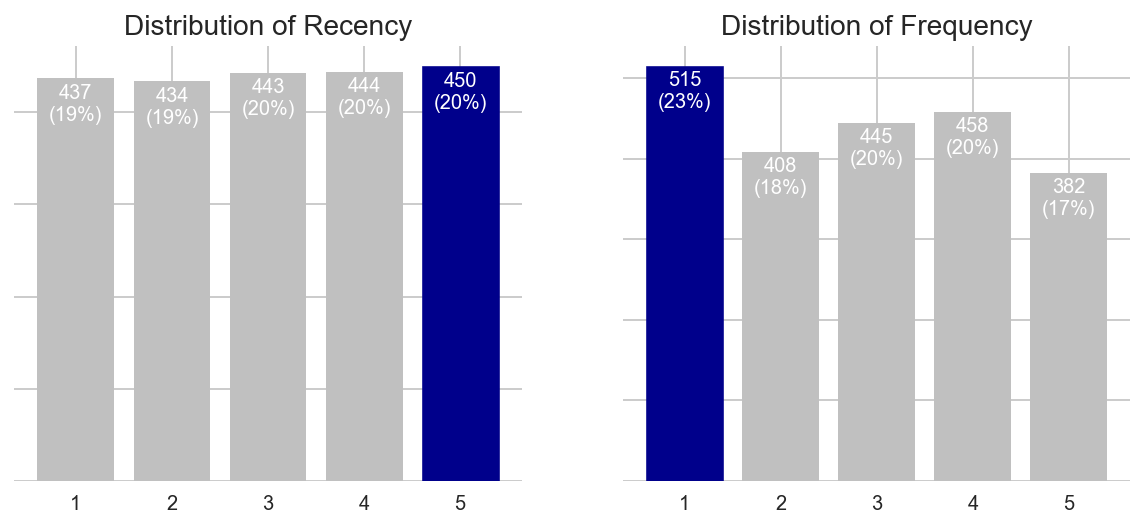


Distribution of M for each F and R :



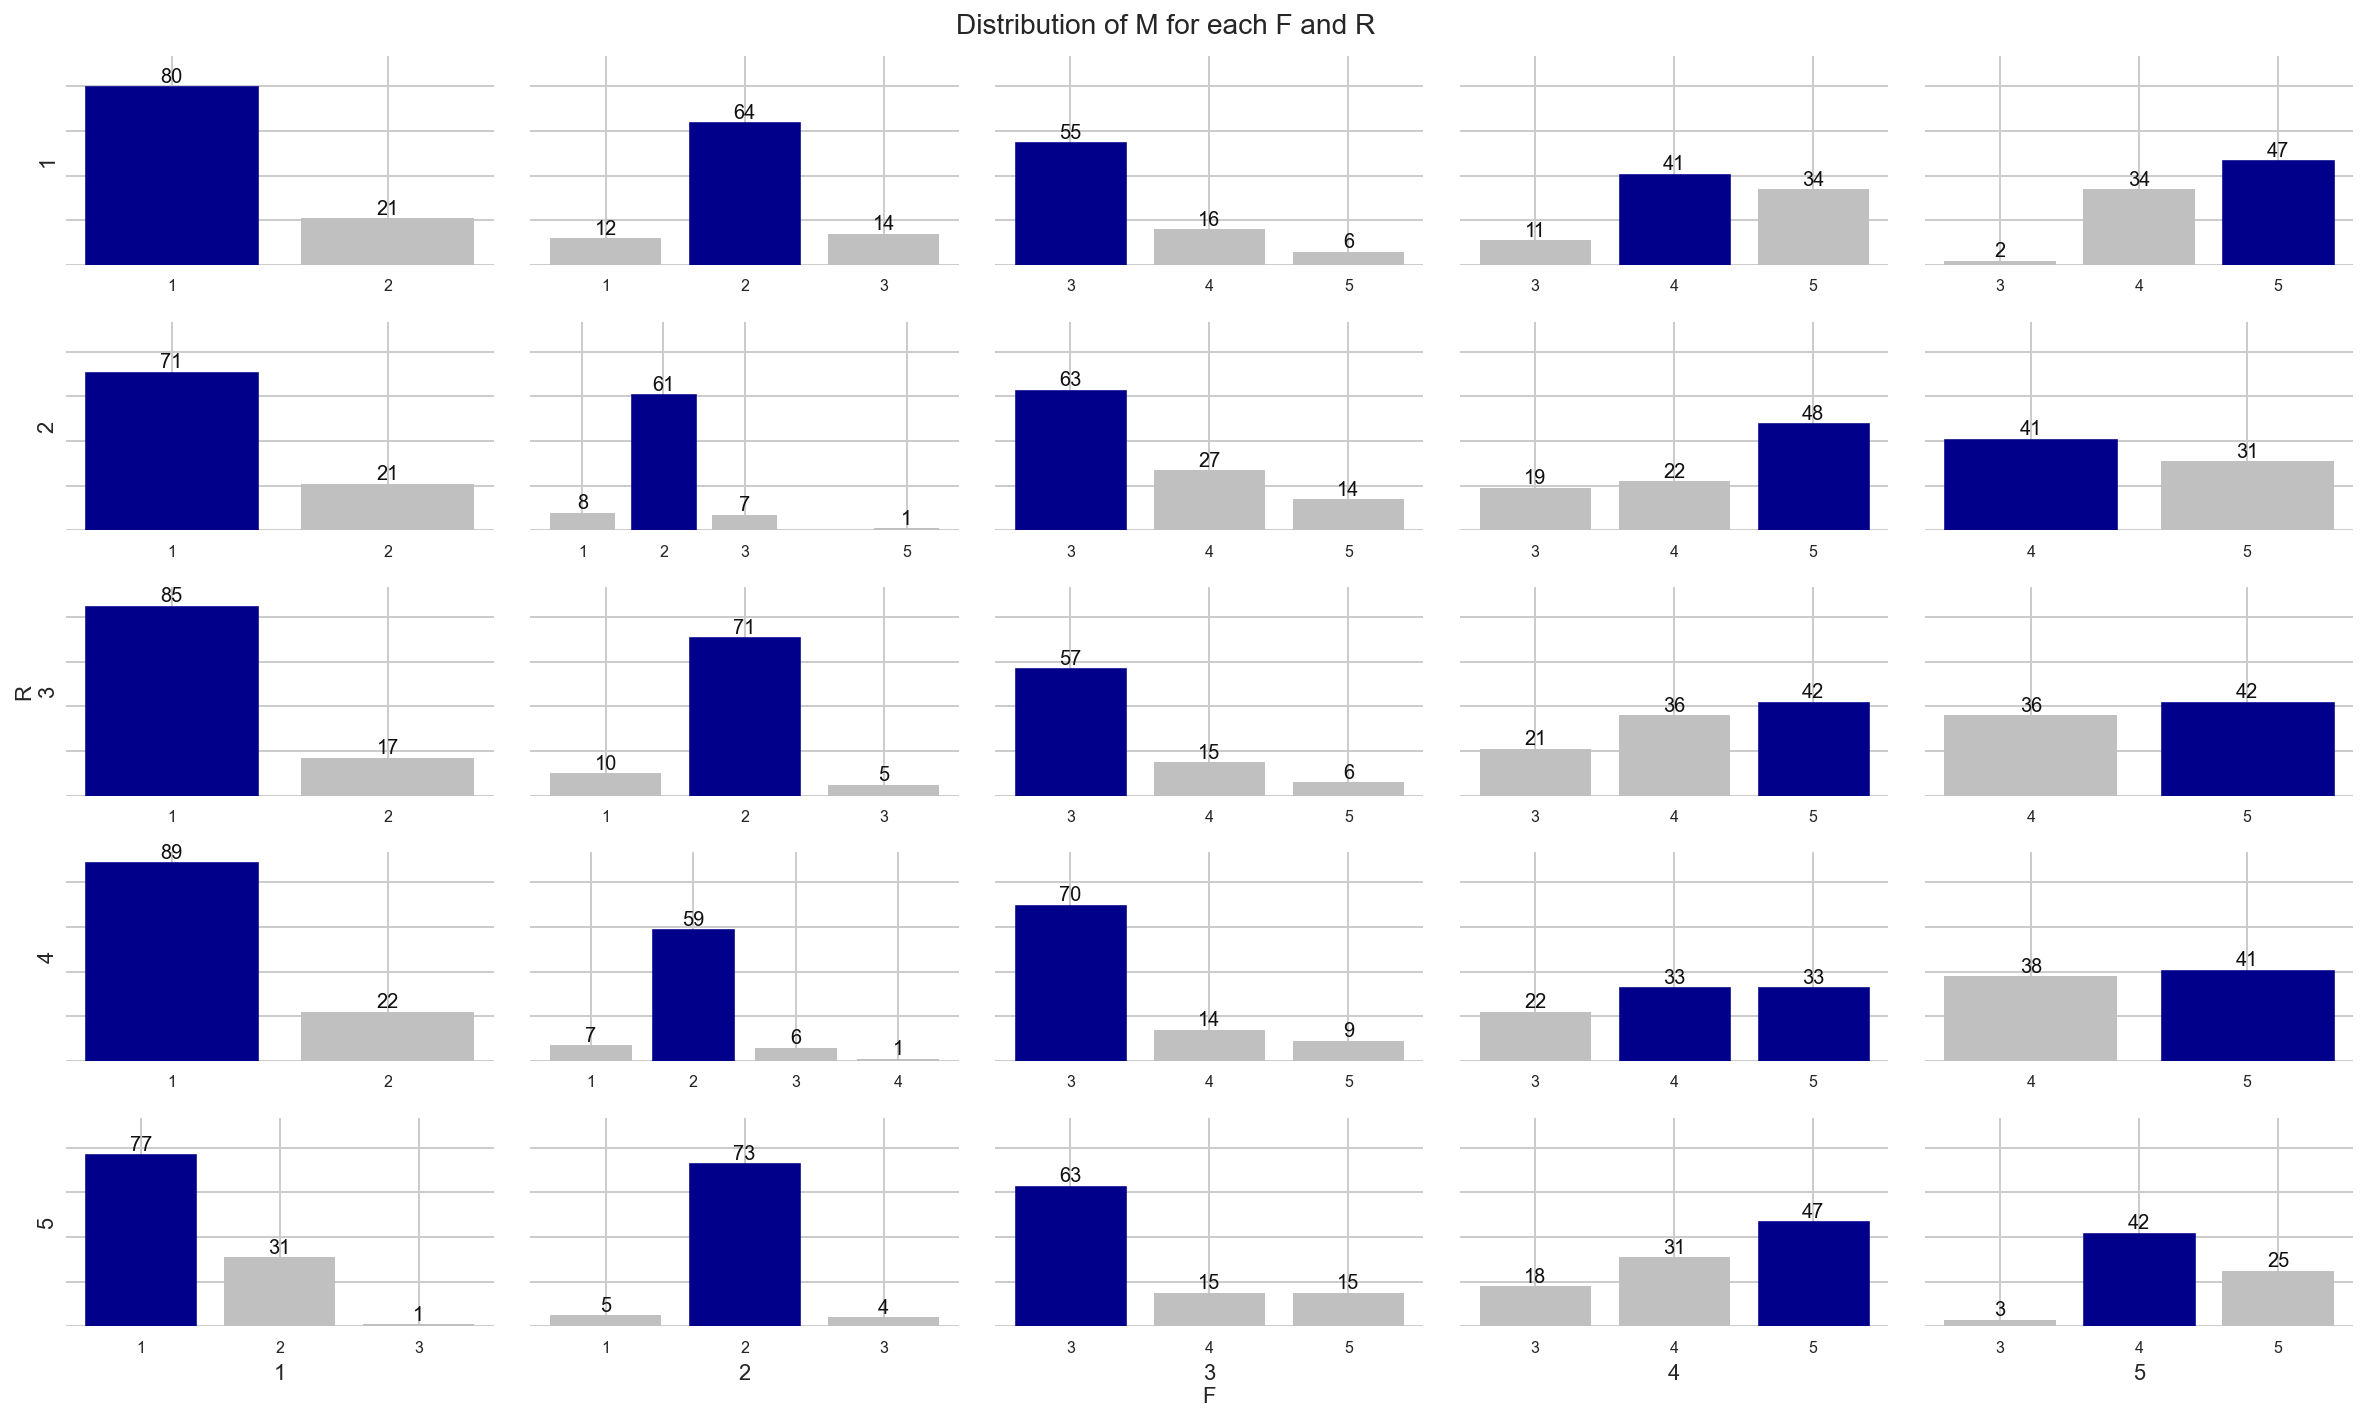


Repartition of labels :



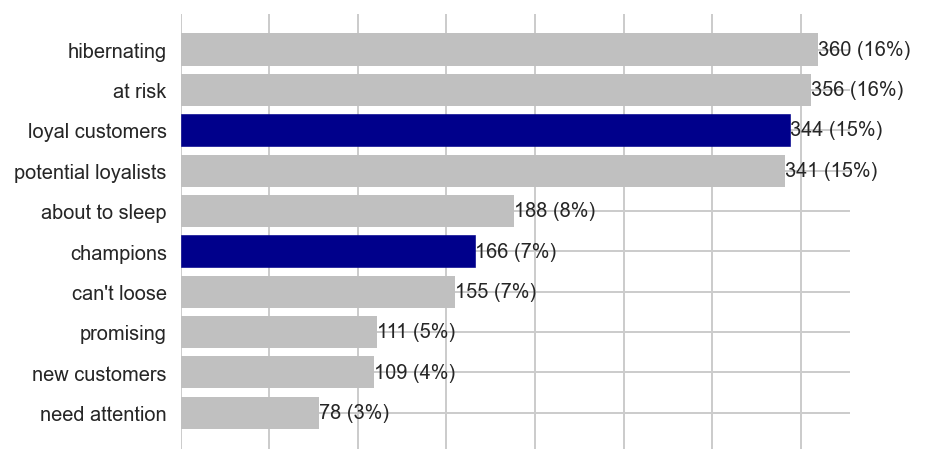

In [748]:
print('\nDistribution of Recency and Frequency :\n')
# plot the distribution of customers over R and F
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

for i, p in enumerate(['R', 'F']):
    parameters = {'R':'Recency', 'F':'Frequency'}
    y = rfm_df[p].value_counts().sort_index()
    x = y.index
    ax = axes[i]
    bars = ax.bar(x, y, color='silver')
    ax.set_frame_on(False)
    ax.tick_params(left=False, labelleft=False, bottom=False)
    ax.set_title('Distribution of {}'.format(parameters[p]),
                fontsize=14)
    for bar in bars:
        value = bar.get_height()
        if value == y.max():
            bar.set_color('darkblue')
        ax.text(bar.get_x() + bar.get_width() / 2,
                value - 5,
                '{}\n({}%)'.format(int(value), int(value * 100 / y.sum())),
               ha='center',
               va='top',
               color='w')
        
plt.show();

print('\nDistribution of M for each F and R :\n')
# plot the distribution of M for RF score
fig, axes = plt.subplots(nrows=5, ncols=5,
                         sharex=False, sharey=True,
                         figsize=(10, 10))

r_range = range(1, 6)
f_range = range(1, 6)
for r in r_range:
    for f in f_range:
        y = rfm_df[(rfm_df['R'] == r) & (rfm_df['F'] == f)]['M'].value_counts().sort_index()
        x = y.index
        ax = axes[r - 1, f - 1]
        bars = ax.bar(x, y, color='silver')
        if r == 5:
            if f == 3:
                ax.set_xlabel('{}\nF'.format(f), va='top')
            else:
                ax.set_xlabel('{}\n'.format(f), va='top')
        if f == 1:
            if r == 3:
                ax.set_ylabel('R\n{}'.format(r))
            else:
                ax.set_ylabel(r)
        ax.set_frame_on(False)
        ax.tick_params(left=False, labelleft=False, bottom=False)
        ax.set_xticks(x)
        ax.set_xticklabels(x, fontsize=8)

        for bar in bars:
            value = bar.get_height()
            if value == y.max():
                bar.set_color('darkblue')
            ax.text(bar.get_x() + bar.get_width() / 2,
                    value,
                    int(value),
                    ha='center',
                    va='bottom',
                    color='k')
fig.suptitle('Distribution of M for each F and R',
             fontsize=14)
plt.tight_layout()
fig.set_size_inches(17, 10)
plt.show();

print('\nRepartition of labels :\n')
# count the number of customers in each segment
segments_counts = rfm_df['Labels'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['champions', 'loyal customers']:
            bar.set_color('darkblue')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show();

In [749]:
merged_df = campaign_df.merge(rfm_df, on='ID')

# Campaign related
r = re.compile("^(AcceptedCmp).*")
cmp_cols = list(filter(r.match, campaign_df.columns)) 
cmp_cols.sort()
print('\nCampaign participation by labels :\n')
for cmp in cmp_cols:
    cmp_n = cmp[-1]
    print(f'\nCampaign #{cmp_n}\n')
    pd.DataFrame(merged_df.groupby(['Labels', cmp]).agg(count=('ID', 'count'))).T


Campaign participation by labels :


Campaign #1



Labels       about to sleep at risk     can't loose     champions      \
AcceptedCmp1              0       0   1           0   1         0   1   
count                   188     328  28         130  25       146  20   

Labels       hibernating loyal customers     need attention    new customers  \
AcceptedCmp1           0               0   1              0  1             0   
count                360             295  49             71  7           109   

Labels       potential loyalists     promising  
AcceptedCmp1                   0   1         0  
count                        329  12       111


Campaign #2



Labels       about to sleep at risk    can't loose    champions     \
AcceptedCmp2              0       0  1           0  1         0  1   
count                   188     349  7         148  7       162  4   

Labels       hibernating    loyal customers    need attention new customers  \
AcceptedCmp2           0  1               0  1              0             0   
count                359  1             337  7             78           109   

Labels       potential loyalists    promising     
AcceptedCmp2                   0  1         0  1  
count                        339  2       109  2


Campaign #3



Labels       about to sleep     at risk     can't loose     champions      \
AcceptedCmp3              0   1       0   1           0   1         0   1   
count                   176  12     331  25         143  12       150  16   

Labels       hibernating     loyal customers     need attention     \
AcceptedCmp3           0   1               0   1              0  1   
count                341  19             313  31             76  2   

Labels       new customers     potential loyalists     promising      
AcceptedCmp3             0   1                   0   1         0   1  
count                   97  12                 320  21        98  13


Campaign #4



Labels       about to sleep    at risk     can't loose     champions      \
AcceptedCmp4              0  1       0   1           0   1         0   1   
count                   186  2     310  46         134  21       143  23   

Labels       hibernating    loyal customers     need attention     \
AcceptedCmp4           0  1               0   1              0  1   
count                355  5             300  44             72  6   

Labels       new customers potential loyalists     promising  
AcceptedCmp4             0                   0   1         0  
count                  109                 324  17       111


Campaign #5



Labels       about to sleep at risk     can't loose     champions      \
AcceptedCmp5              0       0   1           0   1         0   1   
count                   188     315  41         128  27       138  28   

Labels       hibernating loyal customers     need attention    new customers  \
AcceptedCmp5           0               0   1              0  1             0   
count                360             295  49             74  4           109   

Labels       potential loyalists     promising  
AcceptedCmp5                   0   1         0  
count                        330  11       111

### 2.2 - Modeling

In [750]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.features import RadViz

In [751]:
# Encode categorical data
dfs_list = [campaign_df]
for col in cat_cols:
    tmp_df = pd.get_dummies(campaign_df[col], prefix=col)
    dfs_list.append(tmp_df)
    
dfs = [df for df in dfs_list]
df = pd.concat(dfs, axis=1)
df.drop(['Education', 'Marital_Status', 'Dt_Customer'], inplace=True, axis=1)

In [752]:
X = df


K best for KMeans :



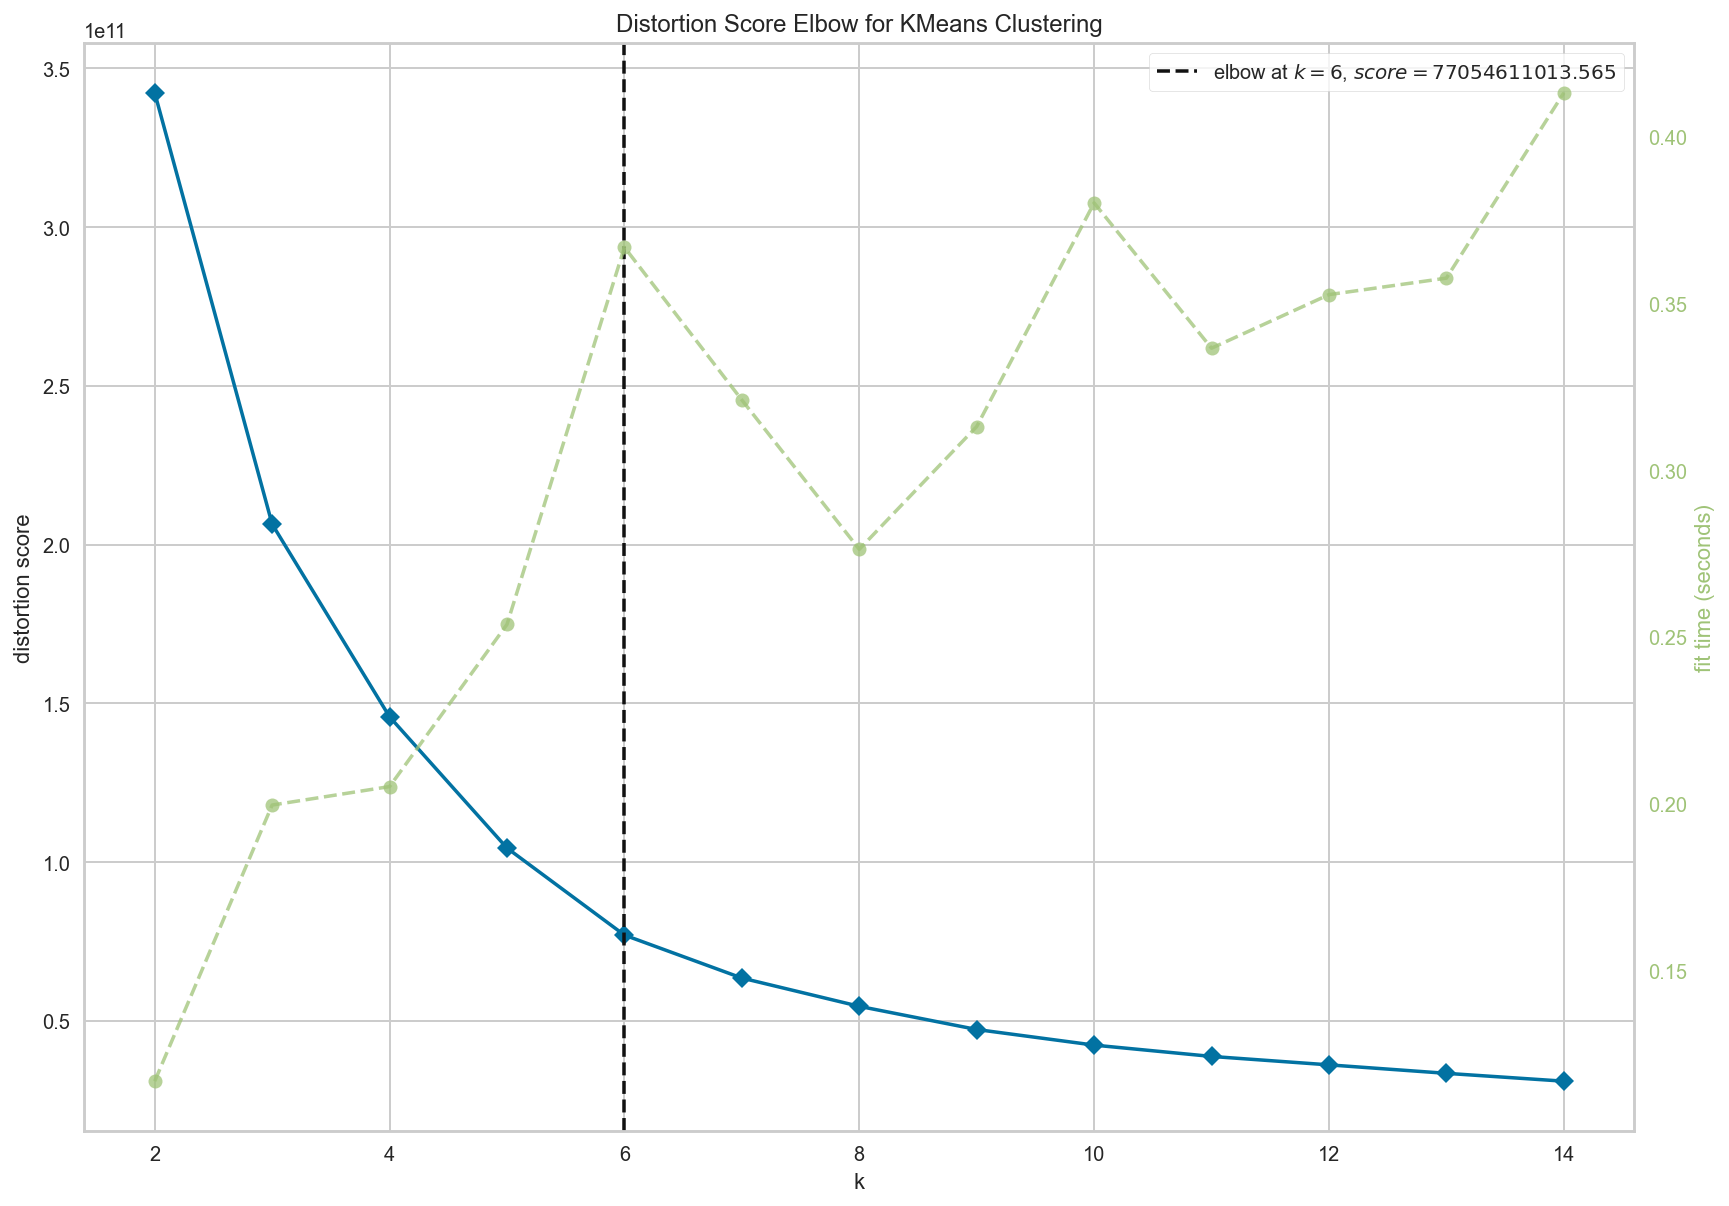


Scatter plot of RFM data. Color = RFM Labels :



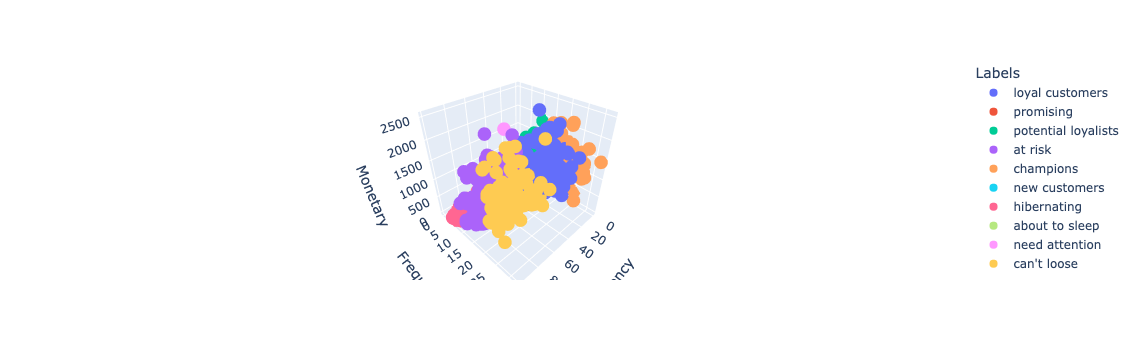


Scatter plot of RFM data. Color = KMeans Labels :



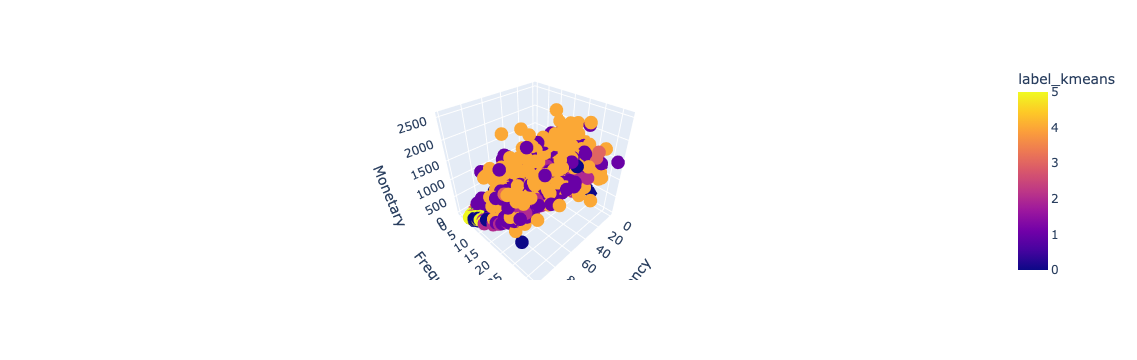

In [753]:
visualizer = RadViz(size=(1000, 720))

model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(X)

print('\nK best for KMeans :\n')
visualizer.show();

kmeans = KMeans(n_clusters=6)
kmeans.fit(X)
labels = kmeans.labels_

df_kmeans = pd.DataFrame(data = X, columns = X.columns)
# Get labels
df_kmeans = df_kmeans.merge(rfm_df[['ID', 'Labels']], on='ID');
df_kmeans['label_kmeans'] = labels

print('\nScatter plot of RFM data. Color = RFM Labels :\n')
fig = px.scatter_3d(df_kmeans, x='Recency', y='Frequency', z='Monetary',
              color='Labels')

fig.show();

print('\nScatter plot of RFM data. Color = KMeans Labels :\n')
fig = px.scatter_3d(df_kmeans, x='Recency', y='Frequency', z='Monetary', color='label_kmeans')
fig.show();

In [783]:
dfgrp_kmeans = df_kmeans.groupby(by='label_kmeans')

cols = ['Income', 'age', 'enrollment_days', 'perc_Discounted_Purchases', 'Monetary', 'Frequency', 'Recency']

for col in cols:
    print(f'\n{col} :\n')
    dfgrp_kmeans[col].describe()[['mean', 'min', 'max']].T


Income :



label_kmeans,0,1,2,3,4,5
mean,20946.409222,66600.852525,51532.623431,158024.285714,82175.65097,36637.103846
min,1730.000000,59060.000000,44124.000000,153924.000000,74485.00000,28839.000000
max,28769.000000,74293.000000,59062.000000,162397.000000,113734.00000,44078.000000



age :



label_kmeans,0,1,2,3,4,5
mean,40.14121,48.474747,49.640167,43.142857,47.590028,43.548077
min,19.00000,20.000000,23.000000,33.000000,20.000000,20.000000
max,69.00000,72.000000,75.000000,66.000000,74.000000,69.000000



enrollment_days :



label_kmeans,0,1,2,3,4,5
mean,531.965418,526.066667,509.238494,538.857143,491.484765,506.001923
min,5.000000,2.000000,2.000000,158.000000,2.000000,1.000000
max,1064.000000,1064.000000,1062.000000,973.000000,1064.000000,1062.000000



perc_Discounted_Purchases :



label_kmeans,0,1,2,3,4,5
mean,41.913545,13.493273,27.417259,45.7,6.544875,34.83925
min,0.000000,0.000000,3.850000,0.0,0.000000,6.25000
max,1500.000000,81.250000,72.730000,100.0,78.570000,77.78000



Monetary :



label_kmeans,0,1,2,3,4,5
mean,72.216138,1021.288889,439.776151,747.857143,1442.390582,140.953846
min,5.000000,18.000000,16.000000,6.000000,277.000000,8.000000
max,1730.000000,2440.000000,1662.000000,1730.000000,2525.000000,839.000000



Frequency :



label_kmeans,0,1,2,3,4,5
mean,5.26513,18.385859,12.665272,11.714286,19.770083,6.796154
min,0.00000,3.000000,3.000000,0.000000,9.000000,3.000000
max,28.00000,32.000000,28.000000,29.000000,32.000000,21.000000



Recency :



label_kmeans,0,1,2,3,4,5
mean,50.086455,48.959596,49.717573,52.285714,49.587258,47.446154
min,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
max,99.000000,99.000000,99.000000,98.000000,99.000000,99.000000


### Conclusion

> Based on the RFM analysis : 
> We could consider to get customers that are not labled as `champion`, `loyal customers` and check if they've reacted to the last campaign (`response`). If not, we may send them the campaign.